# Dog Breed Classification using CNN

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import tflite_runtime.interpreter as tflite
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

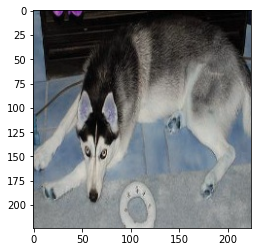

In [3]:
siberianhusky = cv2.imread('../input/dataset-gerry-70-dog-breeds/train/Siberian Husky/01.jpg')
siberianhusky.shape
plt.imshow(siberianhusky)

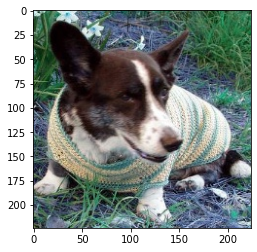

In [4]:
corgi = cv2.imread('../input/dataset-gerry-70-dog-breeds/train/Corgi/001.jpg')
corgi.shape
plt.imshow(corgi)

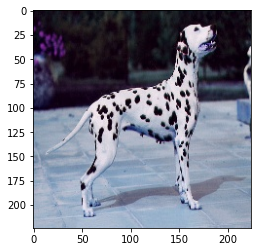

In [5]:
dalmation = cv2.imread('../input/dataset-gerry-70-dog-breeds/train/Dalmation/01.jpg')
dalmation.shape
plt.imshow(dalmation)

In [9]:
class_folder_paths = ['../input/dataset-gerry-70-dog-breeds/test/'+x for x in os.listdir('../input/dataset-gerry-70-dog-breeds/test/')]
class_folder_paths

['../input/dataset-gerry-70-dog-breeds/test/Afghan',
 '../input/dataset-gerry-70-dog-breeds/test/African Wild Dog',
 '../input/dataset-gerry-70-dog-breeds/test/Airedale',
 '../input/dataset-gerry-70-dog-breeds/test/American Hairless',
 '../input/dataset-gerry-70-dog-breeds/test/American Spaniel',
 '../input/dataset-gerry-70-dog-breeds/test/Basenji',
 '../input/dataset-gerry-70-dog-breeds/test/Basset',
 '../input/dataset-gerry-70-dog-breeds/test/Beagle',
 '../input/dataset-gerry-70-dog-breeds/test/Bearded Collie',
 '../input/dataset-gerry-70-dog-breeds/test/Bermaise',
 '../input/dataset-gerry-70-dog-breeds/test/Bichon Frise',
 '../input/dataset-gerry-70-dog-breeds/test/Blenheim',
 '../input/dataset-gerry-70-dog-breeds/test/Bloodhound',
 '../input/dataset-gerry-70-dog-breeds/test/Bluetick',
 '../input/dataset-gerry-70-dog-breeds/test/Border Collie',
 '../input/dataset-gerry-70-dog-breeds/test/Borzoi',
 '../input/dataset-gerry-70-dog-breeds/test/Boston Terrier',
 '../input/dataset-gerry-7

#### check the number of images per class

In [7]:
for class_folder_path in class_folder_paths:
    print('{0}:'.format(class_folder_path), ' ', len(os.listdir(class_folder_path)))

../input/dataset-gerry-70-dog-breeds/test/Afghan:   10
../input/dataset-gerry-70-dog-breeds/test/African Wild Dog:   10
../input/dataset-gerry-70-dog-breeds/test/Airedale:   10
../input/dataset-gerry-70-dog-breeds/test/American Hairless:   10
../input/dataset-gerry-70-dog-breeds/test/American Spaniel:   10
../input/dataset-gerry-70-dog-breeds/test/Basenji:   10
../input/dataset-gerry-70-dog-breeds/test/Basset:   10
../input/dataset-gerry-70-dog-breeds/test/Beagle:   10
../input/dataset-gerry-70-dog-breeds/test/Bearded Collie:   10
../input/dataset-gerry-70-dog-breeds/test/Bermaise:   10
../input/dataset-gerry-70-dog-breeds/test/Bichon Frise:   10
../input/dataset-gerry-70-dog-breeds/test/Blenheim:   10
../input/dataset-gerry-70-dog-breeds/test/Bloodhound:   10
../input/dataset-gerry-70-dog-breeds/test/Bluetick:   10
../input/dataset-gerry-70-dog-breeds/test/Border Collie:   10
../input/dataset-gerry-70-dog-breeds/test/Borzoi:   10
../input/dataset-gerry-70-dog-breeds/test/Boston Terrie

In [10]:
TRAIN_DIR = '../input/dataset-gerry-70-dog-breeds/train/'
VAL_DIR = '../input/dataset-gerry-70-dog-breeds/test/'

### Data Preprocessing

In [11]:
train_data_gen = ImageDataGenerator(horizontal_flip = True,
                                    rotation_range = 20,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range = 0.2)

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size = (224, 224),
                                                     color_mode = 'rgb',
                                                     batch_size = 32,
                                                     class_mode ='categorical',
                                                     shuffle = True)

val_data_gen = ImageDataGenerator()

val_generator = val_data_gen.flow_from_directory(VAL_DIR,
                                                 target_size = (224, 224),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = False)

Found 7946 images belonging to 70 classes.
Found 700 images belonging to 70 classes.


In [12]:
labels = train_generator.class_indices
class_mapping = dict((v,k) for k,v in labels.items())
class_mapping

{0: 'Afghan',
 1: 'African Wild Dog',
 2: 'Airedale',
 3: 'American Hairless',
 4: 'American Spaniel',
 5: 'Basenji',
 6: 'Basset',
 7: 'Beagle',
 8: 'Bearded Collie',
 9: 'Bermaise',
 10: 'Bichon Frise',
 11: 'Blenheim',
 12: 'Bloodhound',
 13: 'Bluetick',
 14: 'Border Collie',
 15: 'Borzoi',
 16: 'Boston Terrier',
 17: 'Boxer',
 18: 'Bull Mastiff',
 19: 'Bull Terrier',
 20: 'Bulldog',
 21: 'Cairn',
 22: 'Chihuahua',
 23: 'Chinese Crested',
 24: 'Chow',
 25: 'Clumber',
 26: 'Cockapoo',
 27: 'Cocker',
 28: 'Collie',
 29: 'Corgi',
 30: 'Coyote',
 31: 'Dalmation',
 32: 'Dhole',
 33: 'Dingo',
 34: 'Doberman',
 35: 'Elk Hound',
 36: 'French Bulldog',
 37: 'German Sheperd',
 38: 'Golden Retriever',
 39: 'Great Dane',
 40: 'Great Perenees',
 41: 'Greyhound',
 42: 'Groenendael',
 43: 'Irish Spaniel',
 44: 'Irish Wolfhound',
 45: 'Japanese Spaniel',
 46: 'Komondor',
 47: 'Labradoodle',
 48: 'Labrador',
 49: 'Lhasa',
 50: 'Malinois',
 51: 'Maltese',
 52: 'Mex Hairless',
 53: 'Newfoundland',
 54

### Initializing MobileNET

In [13]:
before_mobilenet = Sequential([Input((224,224,3)), Lambda(preprocess_input)])

mobilenet = MobileNetV2(input_shape = (224,224,3), include_top = False)

after_mobilenet = Sequential([GlobalAveragePooling2D(),
                              Dropout(0.2),
                              Dense(70, activation = 'softmax')])

model = Sequential([before_mobilenet, mobilenet, after_mobilenet])

9412608/9406464 [==============================] - 38s 4us/step


In [15]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### summarizing the models (visualizing trainable parameters)

In [16]:
model.build(((None, 224, 224, 3)))

before_mobilenet.summary()
mobilenet.summary()
after_mobilenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 224, 224, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  

In [ ]:
train_cb = ModelCheckpoint('./model/', save_best_only = True)

model.fit(train_generator, validation_data = val_generator, callbacks = [train_cb], epochs = 20)

Epoch 1/20
 54/249 [=====>........................] - ETA: 26:20 - loss: 4.5885 - accuracy: 0.0231

In [ ]:
with open("model.tflite", 'wb') as f:
    f.write(tflite_model)